## Predicting Employee Pay at the individual level for Missouri state employees in 2015

The following dataset as been used for the following analysis:

https://data.mo.gov/Government-Administration/2015-State-Employee-Pay-As-Of-COB-November-30-2015/snq5-idu6

In [82]:
# The normal imports
import numpy as np
from numpy.random import randn
import pandas as pd

# Import the stats librayr from numpy
from scipy import stats

# These are the plotting modules adn libraries we'll use:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Command so that plots appear in the iPython Notebook
%matplotlib inline

C:\Users\sneha\Anaconda2\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


###### Step 1: retrieving the data.

In [10]:
#The exported file has been downloaded and renamed as 'Salary.csv'. Let's read it into a CSV file
salary_df = pd.read_csv('Salary.csv')

In [3]:
#Let's take a sneak peek into the data
salary_df.head(20)

,Calendar Year,Agency Name,Position Title,Employee Name,YTD Gross Pay
0,2015,AGRICULTURE,ACCOUNTANT I,"ARNOLD, CAROL ANN",30495.50
1,2015,AGRICULTURE,ACCOUNTANT II,"KLEINDIENST, ANGELA F",31849.50
2,2015,AGRICULTURE,ACCOUNTANT II,"KLIETHERMES, DANA M",34283.50
3,2015,AGRICULTURE,ACCOUNTANT II,"WALKER, JOE E.",39090.50
4,2015,AGRICULTURE,ACCOUNTANT II,"WOOD, KAREN M.",33029.00
5,2015,AGRICULTURE,ADMIN OFFICE SUPPORT ASSISTANT,"ADKINS, LINDA J",27176.50
6,2015,AGRICULTURE,ADMIN OFFICE SUPPORT ASSISTANT,"BISHOP, TAMMIE L.",12235.50
7,2015,AGRICULTURE,ADMIN OFFICE SUPPORT ASSISTANT,"BOUSE, NANCY LEE",30155.00
8,2015,AGRICULTURE,ADMIN OFFICE SUPPORT ASSISTANT,"DEAL, KIMBERLY K.",5438.00
9,2015,AGRICULTURE,ADMIN OFFICE SUPPORT ASSISTANT,"FORSYTHE, AMY D.",19019.50


Observations: 
We have the following fields at hand:
- Calendar Year	: Since all the data in the dataset is of the same year, this won't be of any help in predicting the data
- Agency Name: This field could give us some useful insight
- Position Title: This field could give us some useful insight
- Employee Name: This field won't be of any use for predicting the pay
- YTD Gross Pay: This field is our target 

So let's now drop the fields we won't be using in predicting the pay

In [14]:
salary_cond_df = salary_df[[1,2,4]] #condensed dataframe
salary_cond_df.head()

,Agency Name,Position Title,YTD Gross Pay
0,AGRICULTURE,ACCOUNTANT I,30495.5
1,AGRICULTURE,ACCOUNTANT II,31849.5
2,AGRICULTURE,ACCOUNTANT II,34283.5
3,AGRICULTURE,ACCOUNTANT II,39090.5
4,AGRICULTURE,ACCOUNTANT II,33029.0


In [26]:
#let's see the unique values for Agency Name and Position Title
salary_cond_df[[0,1]].describe()

,Agency Name,Position Title
count,71788,71788
unique,24,2601
top,CORRECTIONS,CORRECTIONS OFCR I
freq,13301,5724


As we can see there are 24 unique Agency Name. However there are 2601 unique Position Titles. That is a huge number.
On a closer observation we see that many postions have multiple levels to them.For example "ACCOUNTANT" has positions like
"ACCOUNTANT I", "ACCOUNTANT II" and so on.
It would be worthwhile to seperate the Postion name and their level into seperate fields. The following cell does that 

Roman Suffixes like I, II etc.. are given a value 1,2,.. in the field 'Position Level'. Positions without the suffixes are given a value 0. 'Position Title New' contains the Position Title  without roman suffixes. 

##### Step 2: building features 

In [53]:
position_lvl = pd.Series()
position_new = pd.Series()
lvl_dict = {"I " : 1, "II ": 2, "III " : 3, "VI ": 4, "V ": 5, "IV ": 6, "IIV ": 7}  #since the comparasion is with reverse
def get_position_lvl(sal_df):
    for idx,pos in sal_df.iterrows():
        new_pos = pos[1]
        temp = 0
        if pos[1][::-1][:2] in lvl_dict:
            temp = lvl_dict[pos[1][::-1][:2]]
            new_pos = new_pos[0:len(new_pos) - 2]
        elif pos[1][::-1][:3] in lvl_dict:
            temp = lvl_dict[pos[1][::-1][:3]]
            new_pos = new_pos[0:len(new_pos) - 3]
        elif pos[1][::-1][:4] in lvl_dict:
            temp = lvl_dict[pos[1][::-1][:4]]
            new_pos = new_pos[0:len(new_pos) - 4]        
        position_new.set_value(idx,new_pos )
        position_lvl.set_value(idx,temp )


In [59]:
get_position_lvl(salary_cond_df)
salary_cond_df['Position Title New'] =  position_new
salary_cond_df['Position Level'] = position_lvl

In [61]:
#Let's take a look at our new data
salary_cond_df.head(100)

,Agency Name,Position Title,YTD Gross Pay,Position Title New,Position Level
0,AGRICULTURE,ACCOUNTANT I,30495.50,ACCOUNTANT,1
1,AGRICULTURE,ACCOUNTANT II,31849.50,ACCOUNTANT,2
2,AGRICULTURE,ACCOUNTANT II,34283.50,ACCOUNTANT,2
3,AGRICULTURE,ACCOUNTANT II,39090.50,ACCOUNTANT,2
4,AGRICULTURE,ACCOUNTANT II,33029.00,ACCOUNTANT,2
5,AGRICULTURE,ADMIN OFFICE SUPPORT ASSISTANT,27176.50,ADMIN OFFICE SUPPORT ASSISTANT,0
6,AGRICULTURE,ADMIN OFFICE SUPPORT ASSISTANT,12235.50,ADMIN OFFICE SUPPORT ASSISTANT,0
7,AGRICULTURE,ADMIN OFFICE SUPPORT ASSISTANT,30155.00,ADMIN OFFICE SUPPORT ASSISTANT,0
8,AGRICULTURE,ADMIN OFFICE SUPPORT ASSISTANT,5438.00,ADMIN OFFICE SUPPORT ASSISTANT,0
9,AGRICULTURE,ADMIN OFFICE SUPPORT ASSISTANT,19019.50,ADMIN OFFICE SUPPORT ASSISTANT,0


#### Hunting for outliers

In this step we will do the following two things:
1) Find and delete any salary that does not fall into the normal range (i.e. too large)
2) Any negitive salary

In [67]:
#First let's sort the Gross Pay in decending order to see any outliers
sorted(salary_cond_df['YTD Gross Pay'], reverse = True)

[890822.72999999998,
 310970.69,
 272070.92999999999,
 271998.59000000003,
 270891.66999999998,
 265474.40000000002,
 258982.35999999999,
 249076.26000000001,
 243346.26000000001,
 221486.26000000001,
 221106.66,
 210312.63,
 210090.0,
 201402.89999999999,
 199986.95000000001,
 192251.57999999999,
 192251.57999999999,
 186085.35000000001,
 185232.47,
 184326.5,
 182804.45000000001,
 182804.45000000001,
 180869.60999999999,
 180618.48999999999,
 178421.26000000001,
 178213.54000000001,
 177189.73999999999,
 171195.34,
 170043.42000000001,
 169602.98000000001,
 169456.26000000001,
 169456.26000000001,
 169456.26000000001,
 169456.26000000001,
 169456.26000000001,
 169456.26000000001,
 169456.26000000001,
 169065.01000000001,
 167323.60000000001,
 162829.14999999999,
 162782.17000000001,
 162782.17000000001,
 153000.82000000001,
 148656.0,
 143433.16,
 141013.0,
 141013.0,
 141013.0,
 141013.0,
 141013.0,
 139406.5,
 139231.0,
 131179.72,
 130344.52,
 128927.16,
 128927.16,
 128927.16,
 1

In [72]:
#As we see there's one salary that's far greater than other salaries. Let's find and deleted it
salary_cond_df[salary_cond_df['YTD Gross Pay']>400000]

,Agency Name,Position Title,YTD Gross Pay,Position Title New,Position Level
31627,MENTAL HEALTH,CLIENT/PATIENT WORKER,890822.73,CLIENT/PATIENT WORKER,0


In [75]:
salary_cond_df.drop(31627, inplace=True)
sorted(salary_cond_df['YTD Gross Pay'], reverse = True)

[310970.69,
 272070.92999999999,
 271998.59000000003,
 270891.66999999998,
 265474.40000000002,
 258982.35999999999,
 249076.26000000001,
 243346.26000000001,
 221486.26000000001,
 221106.66,
 210312.63,
 210090.0,
 201402.89999999999,
 199986.95000000001,
 192251.57999999999,
 192251.57999999999,
 186085.35000000001,
 185232.47,
 184326.5,
 182804.45000000001,
 182804.45000000001,
 180869.60999999999,
 180618.48999999999,
 178421.26000000001,
 178213.54000000001,
 177189.73999999999,
 171195.34,
 170043.42000000001,
 169602.98000000001,
 169456.26000000001,
 169456.26000000001,
 169456.26000000001,
 169456.26000000001,
 169456.26000000001,
 169456.26000000001,
 169456.26000000001,
 169065.01000000001,
 167323.60000000001,
 162829.14999999999,
 162782.17000000001,
 162782.17000000001,
 153000.82000000001,
 148656.0,
 143433.16,
 141013.0,
 141013.0,
 141013.0,
 141013.0,
 141013.0,
 139406.5,
 139231.0,
 131179.72,
 130344.52,
 128927.16,
 128927.16,
 128927.16,
 128927.16,
 128927.16,

In [78]:
#Now let's delete all the salaries that are less than zero
salary_cond_df.drop(salary_cond_df[salary_cond_df['YTD Gross Pay'] <0].index , inplace=True)

In [79]:
sorted(salary_cond_df['YTD Gross Pay'])

[0.31,
 0.56999999999999995,
 2.0299999999999998,
 2.4100000000000001,
 3.48,
 3.54,
 3.6000000000000001,
 3.6400000000000001,
 3.9700000000000002,
 4.0,
 5.04,
 5.21,
 7.1100000000000003,
 8.8599999999999994,
 9.0399999999999991,
 9.7400000000000002,
 10.050000000000001,
 11.02,
 11.109999999999999,
 11.43,
 12.5,
 12.9,
 12.9,
 13.68,
 14.75,
 16.57,
 17.030000000000001,
 17.16,
 17.59,
 17.800000000000001,
 18.010000000000005,
 20.0,
 20.73,
 20.73,
 20.73,
 20.73,
 20.73,
 20.73,
 20.73,
 20.73,
 20.73,
 21.0,
 21.640000000000001,
 21.829999999999998,
 22.120000000000001,
 22.120000000000001,
 22.120000000000001,
 22.920000000000002,
 23.84,
 23.989999999999998,
 24.0,
 24.239999999999998,
 24.43,
 25.0,
 25.0,
 25.0,
 25.0,
 25.100000000000001,
 25.149999999999999,
 25.18,
 25.219999999999999,
 25.920000000000002,
 26.399999999999999,
 26.629999999999999,
 26.780000000000001,
 27.120000000000001,
 27.640000000000001,
 27.640000000000001,
 28.059999999999999,
 28.399999999999999,
 

#### Rounding off 
Now let's convert all the Float values into Real numbers. This will make it easy for us to visualize the data

In [98]:
salary_cond_df=salary_cond_df.round({'YTD Gross Pay': 0})

In [99]:
salary_cond_df.head()

,Agency Name,Position Title,YTD Gross Pay,Position Title New,Position Level
2,AGRICULTURE,ACCOUNTANT II,34284,ACCOUNTANT,2
3,AGRICULTURE,ACCOUNTANT II,39090,ACCOUNTANT,2
4,AGRICULTURE,ACCOUNTANT II,33029,ACCOUNTANT,2
5,AGRICULTURE,ADMIN OFFICE SUPPORT ASSISTANT,27176,ADMIN OFFICE SUPPORT ASSISTANT,0
6,AGRICULTURE,ADMIN OFFICE SUPPORT ASSISTANT,12236,ADMIN OFFICE SUPPORT ASSISTANT,0


At this point, it is very obvious that the number of features are too less. We only have two features : Agency Name, Position Title that can somehow predict the Gross Pay.

###### Step 3: Predicitng the salary

One simple way to predict that salary is to create two pivot tables:

1. Of mean salary

2. Of Standard deviation.

Using the information of these two tables, we can predict the Range of the salary of an employee given his or her Agency Name and  Position Title


In [102]:
#Mean
pd.pivot_table(salary_cond_df, values = 'YTD Gross Pay', index = ['Position Title New','Position Level'], columns=['Agency Name'], 
               aggfunc=np.mean).dropna(how='all')

Agency Name                                     AGRICULTURE  CONSERVATION  \
Position Title New             Position Level                               
ACADEMIC TEACHER               1                        NaN           NaN   
                               2                        NaN           NaN   
                               3                        NaN           NaN   
ACCOUNT CLERK                  0                        NaN           NaN   
                               1                        NaN           NaN   
                               2                        NaN           NaN   
                               3                        NaN           NaN   
ACCOUNTANT                     0                        NaN           NaN   
                               1                        NaN           NaN   
                               2               35467.666667           NaN   
                               3                        NaN           NaN   
ACCOUNTING ANAL                1                        NaN           NaN   
                               2                        NaN           NaN   
                               3                        NaN           NaN   
ACCOUNTING ANALYST             0                        NaN           NaN   
                               2                        NaN           NaN   
ACCOUNTING ASSISTANT           0                        NaN   9435.000000   
ACCOUNTING AUDIT ANALYST       0                        NaN           NaN   
ACCOUNTING MANAGER             0                        NaN           NaN   
ACCOUNTING SPECIALIST          0                        NaN           NaN   
                               1                        NaN           NaN   
                               2                        NaN           NaN   
                               3                        NaN           NaN   
ACCOUNTING SUPERVISOR          0                        NaN           NaN   
                               1                        NaN           NaN   
                               2                        NaN           NaN   
ACCOUNTING TECHNICIAN          0                        NaN  16475.703704   
ACCTNG ANALYST                 1                        NaN           NaN   
ACTIVITIES DIRECTOR            0                        NaN           NaN   
ACTIVITY AIDE                  1                        NaN           NaN   
...                                                     ...           ...   
WILDLIFE MGMT BIOLOGIST        0                        NaN  37825.771429   
WILDLIFE MGMT CHIEF            0                        NaN  58151.000000   
WILDLIFE MGMT COORDINATOR      0                        NaN  54013.000000   
WILDLIFE PROGRAMS SUPV         0                        NaN  39490.000000   
WILDLIFE REGIONAL SUPV         0                        NaN  49674.500000   
WILDLIFE TECHNICIAN            0                        NaN  12345.333333   
WKRS COMP SAFETY CONSULTANT    1                        NaN           NaN   
WORK THERAPY SPECIALIST        1                        NaN           NaN   
                               2                        NaN           NaN   
WORKERS COMPENSATION SPEC      0                        NaN           NaN   
WORKERS' COMP TECH             1                        NaN           NaN   
                               2                        NaN           NaN   
                               3                        NaN           NaN   
WORKERS' COMP TECH SUPV        0                        NaN           NaN   
WORKFORCE DEVELOPMENT SPEC     1                        NaN           NaN   
                               2                        NaN           NaN   
                               3                        NaN           NaN   
                               4                        NaN           NaN   
WORKFORCE DEVELOPMENT SUPV     1                        NaN           NaN

In [103]:
#Standard deviation
pd.pivot_table(salary_cond_df, values = 'YTD Gross Pay', index = ['Position Title New','Position Level'], columns=['Agency Name'], 
               aggfunc=np.std).dropna(how='all')

Agency Name                                  AGRICULTURE  CONSERVATION  \
Position Title New           Position Level                              
ACADEMIC TEACHER             1                       NaN           NaN   
                             2                       NaN           NaN   
                             3                       NaN           NaN   
ACCOUNT CLERK                1                       NaN           NaN   
                             2                       NaN           NaN   
                             3                       NaN           NaN   
ACCOUNTANT                   1                       NaN           NaN   
                             2               3199.176509           NaN   
                             3                       NaN           NaN   
ACCOUNTING ANAL              2                       NaN           NaN   
                             3                       NaN           NaN   
ACCOUNTING ANALYST           0                       NaN           NaN   
                             2                       NaN           NaN   
ACCOUNTING ASSISTANT         0                       NaN   7031.518496   
ACCOUNTING MANAGER           0                       NaN           NaN   
ACCOUNTING SPECIALIST        0                       NaN           NaN   
                             1                       NaN           NaN   
                             2                       NaN           NaN   
                             3                       NaN           NaN   
ACCOUNTING SUPERVISOR        1                       NaN           NaN   
ACCOUNTING TECHNICIAN        0                       NaN   9428.695578   
ACTIVITIES DIRECTOR          0                       NaN           NaN   
ACTIVITY AIDE                1                       NaN           NaN   
                             2                       NaN           NaN   
                             3                       NaN           NaN   
ACTIVITY THER                0                       NaN           NaN   
ACTIVITY THERAPY COOR        0                       NaN           NaN   
ACTUARY                      0                       NaN           NaN   
ADLT PROT & CMTY SUPV        0                       NaN           NaN   
ADLT PROT & CMTY WKR         1                       NaN           NaN   
...                                                  ...           ...   
WILDLIFE ADMINISTRATIVE MGR  0                       NaN  10605.187504   
WILDLIFE BIOLOGIST           0                       NaN  12111.334903   
WILDLIFE BIOLOGIST ASSISTANT 0                       NaN   7109.270005   
WILDLIFE DAMAGE BIOLOGIST    0                       NaN   6020.708419   
WILDLIFE ECOLOGIST           0                       NaN    678.115403   
WILDLIFE MANAGEMENT ASST     0                       NaN   4126.312352   
WILDLIFE MGMT BIOLOGIST      0                       NaN   5982.182698   
WILDLIFE MGMT CHIEF          0                       NaN   4326.079287   
WILDLIFE REGIONAL SUPV       0                       NaN   5873.643065   
WILDLIFE TECHNICIAN          0                       NaN   5462.786865   
WORK THERAPY SPECIALIST      1                       NaN           NaN   
                             2                       NaN           NaN   
WORKERS COMPENSATION SPEC    0                       NaN           NaN   
WORKERS' COMP TECH           1                       NaN           NaN   
                             2                       NaN           NaN   
                             3                       NaN           NaN   
WORKFORCE DEVELOPMENT SPEC   1                       NaN           NaN   
                             2                       NaN           NaN   
                             4                       NaN           NaN   
WORKFORCE DEVELOPMENT SUPV   1                       NaN           NaN   
                             2                       NaN           NaN   
    

Using the above two tables, we can with 68.2 confidence predict the range of salary of a person.
For example, someone with Agency Name = 'CORRECTIONS' and Position Title ='ACADEMIC TEACHER III'
would have a salary between (28113.786325 -7762.997396) to  (28113.786325 + 7762.997396) with 68% confidence.

This is ofcourse, a huge range stil.

#### Visualizing data 
Let's try to visualize the Gross Pay against the Position Level and see if we can find any linear pattern 

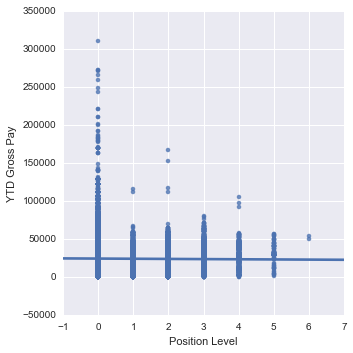

In [121]:
sns.lmplot("Position Level","YTD Gross Pay",salary_cond_df)

As we can see there isn't any obvious pattern between the Gross Pay and Position Levels. As such, it's very hard to predict salary based on Position Level . We can try to go higher order to see if we can find any relationship. We can also draw a vilon plot to get a better understanding .

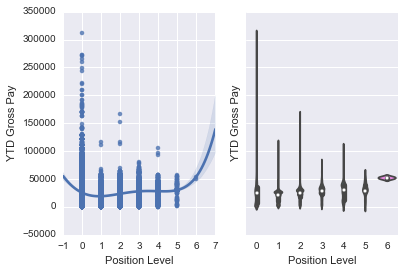

In [130]:
# Create figure with 2 subplots
fig, (axis1,axis2) = plt.subplots(1,2,sharey =True)

sns.regplot("Position Level","YTD Gross Pay",salary_cond_df, order =5, ax = axis1)
sns.violinplot(salary_cond_df['Position Level'],salary_cond_df['YTD Gross Pay'],order=[0,1,2,3,4,5,6],ax=axis2)

As we can now see, this gives a slightly better understanding of the relationship between Poistion level and Gross Pay, however it's still not enough for us to predict the salary.

#### Approaches to improve the model

Because the number of features are so less, regression ML algorithms won't be of much use. Infact, the only viable option is to improve the data quality and incorporate more features like : "Experience of Person" "Performance Rating" etc. 